In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("suchintikasarkar/sentiment-analysis-for-mental-health")

print("Path to dataset files:", path)

100%|██████████| 11.1M/11.1M [00:01<00:00, 7.34MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/suchintikasarkar/sentiment-analysis-for-mental-health/versions/1


In [4]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/suchintikasarkar/sentiment-analysis-for-mental-health/versions/1"
os.listdir(dataset_path)


['Combined Data.csv']

In [5]:
import pandas as pd

file_path = "/root/.cache/kagglehub/datasets/suchintikasarkar/sentiment-analysis-for-mental-health/versions/1/Combined Data.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [6]:
import re

# Drop unnecessary columns (if any exist)
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Check for missing values
missing_values = df.isnull().sum()

# Function to clean text data
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning to the 'statement' column
df["statement"] = df["statement"].astype(str).apply(clean_text)

# Remove rows with missing statements
df = df.dropna(subset=["statement"])



# Display results
missing_values


,0
statement,362
status,0


<Axes: xlabel='status'>

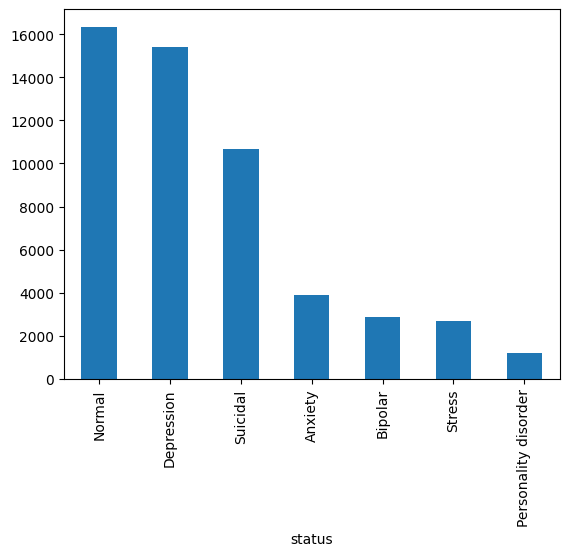

In [7]:
 df["status"].value_counts().plot(kind='bar')

In [8]:
!pip install openai


In [9]:
import openai

In [10]:
openai.api_key = #paste your api key here



In [11]:

import random
import openai

def classify_with_few_shot_optimized(text, df):
    examples = df.sample(n=7, random_state=random.randint(0, 100))  # Use 7 examples for better accuracy
    example_texts = "\n".join([f'- "{row["statement"]}" → **{row["status"]}**' for _, row in examples.iterrows()])

    prompt = f"""
    You are an AI trained to classify mental health statements. Below are examples:

    {example_texts}

    Categories:
    - **Normal**: No signs of mental distress.
    - **Depression**: Feelings of sadness, hopelessness, loss of interest.
    - **Suicidal**: Expressing self-harm thoughts, no reason to live.
    - **Anxiety**: Nervousness, overthinking, excessive worry.
    - **Bipolar**: Extreme mood swings, from very happy to deeply sad.
    - **Stress**: Feeling overwhelmed, struggling with pressure.
    - **Personality disorder**: Unstable emotions, identity confusion.

    Now analyze and classify: "{text}"

    Provide only the category name.
    """

    response = openai.chat.completions.create(
        model="gpt-4-turbo",
        messages=[{"role": "system", "content": "You are a mental health classification assistant."},
                  {"role": "user", "content": prompt}]
    )

    return response.choices[0].message.content.strip()



In [24]:
df_sample = df.sample(n=100, random_state=42)  # Select a random subset of 100 rows

# Apply classification to the sample
df_sample["predicted_status"] = df_sample["statement"].apply(lambda x: classify_with_few_shot_optimized(x, df))


In [25]:
def clean_prediction(prediction):
    return prediction.replace("*", "").strip()  # Remove asterisks and whitespace


In [26]:
df_sample["predicted_status"] = df_sample["predicted_status"].apply(clean_prediction)


In [27]:
df_sample.head()


,statement,status,predicted_status
22261,just as the the title says i feel like one is ...,Depression,Personality disorder
41400,a blackened sky encroached tugging behind it m...,Depression,Depression
20065,it gives you insomnia which in turn makes your...,Depression,Depression
30036,hello all im a new submitter to this channel i...,Normal,Normal
780,thank god the cb is over for eid,Normal,Normal


In [29]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(df_sample["status"], df_sample["predicted_status"])
print(f"Accuracy on Sample (100 rows): {accuracy:.2%}")





Accuracy on Sample (100 rows): 68.00%
